# IMPORT THE PACKAGES AND DATASETS

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'pandas'

In [3]:
# Suppress all warnings
warnings.simplefilter("ignore")

# Load the dataset
file_path = '/Users/sahil/My Data/Boston Institue of Analytics/Capstone Project/powerconsumption.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

              Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
1  2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2  2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
3  2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
4  2017-01-01 00:40:00        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373 

# DATA EXPLORATION AND PREPROCESSING:

In [5]:
# Explore the data
print(df.head())
print(df.info())
print(df.describe())

              Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
1  2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2  2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
3  2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
4  2017-01-01 00:40:00        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373 

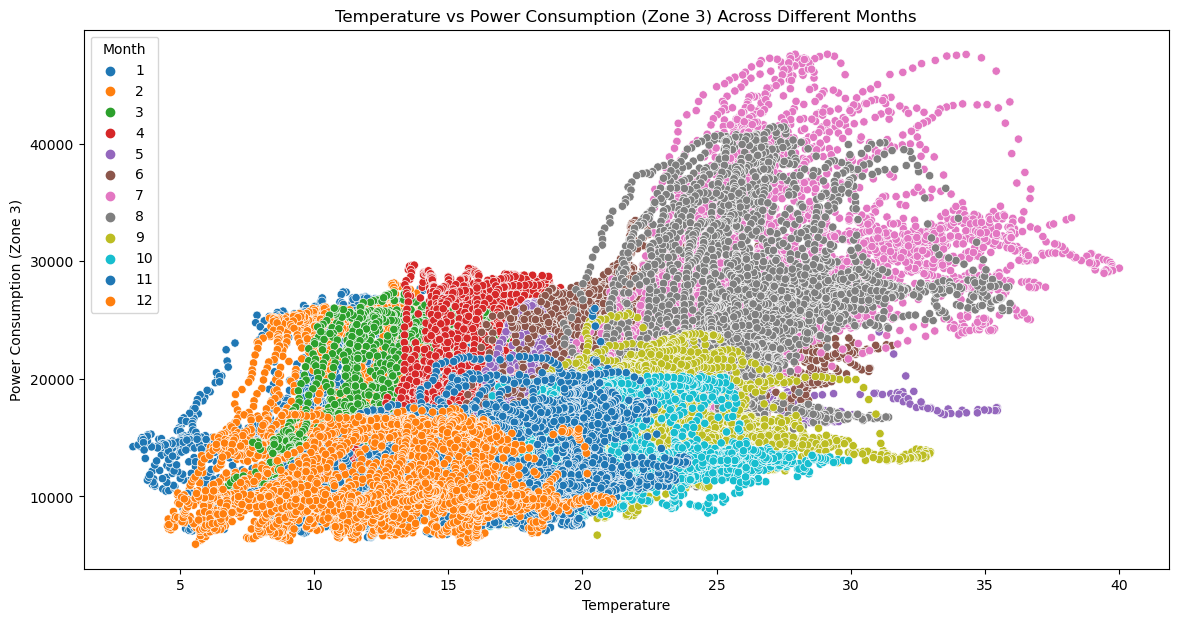

In [72]:
# Comparison of Temperature vs. Power Consumption Across Different Months
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Temperature', y='PowerConsumption_Zone3', hue='Month', palette='tab10', data=df)
plt.title('Temperature vs Power Consumption (Zone 3) Across Different Months')
plt.xlabel('Temperature')
plt.ylabel('Power Consumption (Zone 3)')
plt.legend(title='Month')
plt.show()

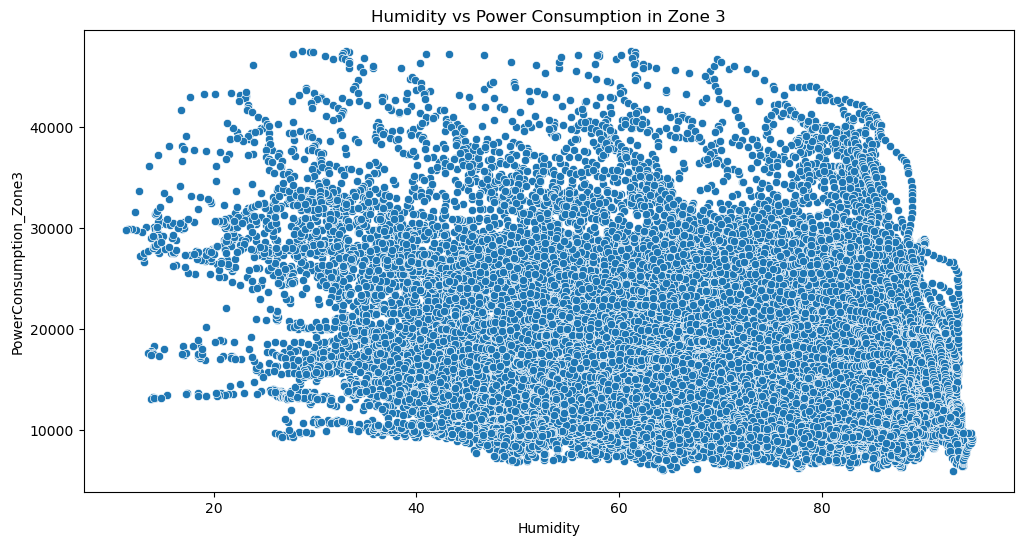

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Humidity', y='PowerConsumption_Zone3', data=df)
plt.title('Humidity vs Power Consumption in Zone 3')
plt.show()

In [7]:
# Identify any missing values or outliers
print(df.isnull().sum())

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64


In [9]:
# Handle missing values
df = df.fillna(method='ffill')

# Engineer features
df['Hour'] = pd.to_datetime(df['Datetime']).dt.hour
df['Day'] = pd.to_datetime(df['Datetime']).dt.day
df['Month'] = pd.to_datetime(df['Datetime']).dt.month

# Drop original 'Datetime' column
df = df.drop(columns=['Datetime'])

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X = df[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'Hour', 'Day', 'Month']]
y = df['PowerConsumption_Zone3']


# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Hour,Day,Month
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,1,1
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,1,1
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,1,1
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,1,1
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,23,30,12
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23,30,12
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,23,30,12
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,23,30,12


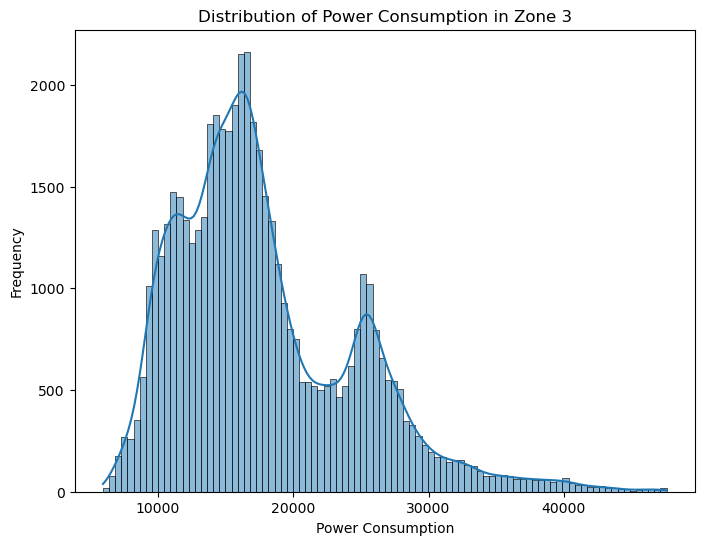

In [13]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['PowerConsumption_Zone3'], kde=True)
plt.title('Distribution of Power Consumption in Zone 3')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.show()

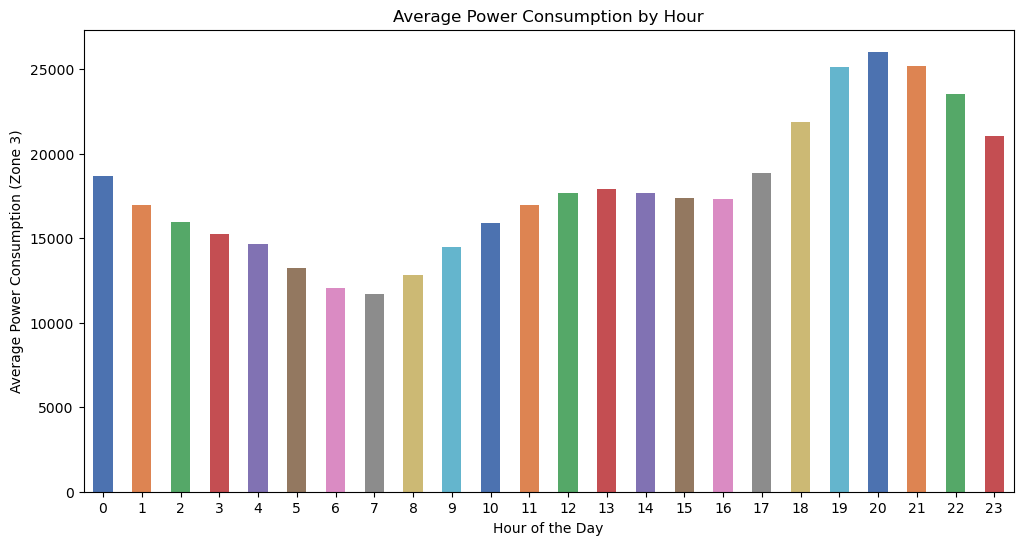

In [74]:
# Bar Chart for Average Power Consumption by Hour
plt.figure(figsize=(12, 6))
avg_power_by_hour = df.groupby('Hour')['PowerConsumption_Zone3'].mean()
avg_power_by_hour.plot.bar(color=sns.color_palette('deep'))
plt.title('Average Power Consumption by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Power Consumption (Zone 3)')
plt.xticks(rotation=0)
plt.show()

# FEATURE SELECTION

#### CORELATION ANALYSIS

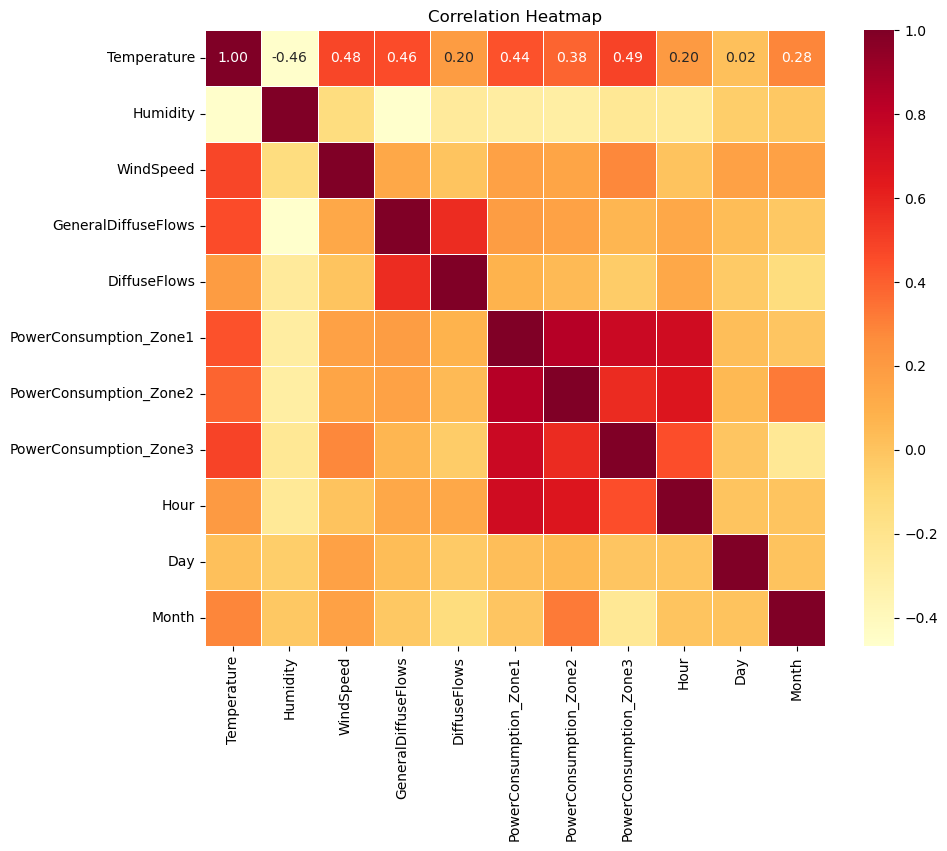

In [83]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### MUTUAL INFORMATION

In [17]:
from sklearn.feature_selection import mutual_info_regression

# Calculate mutual information scores
mutual_info = mutual_info_regression(X, y)

# Create a DataFrame with feature names and mutual information scores
mutual_info_df = pd.DataFrame({'feature': X.columns, 'mi': mutual_info})

# Sort the DataFrame by mutual information score
mutual_info_df = mutual_info_df.sort_values(by='mi', ascending=False)

# Select the top features based on mutual information
top_features = mutual_info_df.head(5)['feature'].tolist()

#### RECURSIVE FEATURE ELIMINATION

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Perform recursive feature elimination
rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(X, y)

# Get the selected feature names
selected_features = X.columns[rfe.support_]

# MODEL SELECTION AND TUNNING

In [35]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'XGBoost Regression': xgb.XGBRegressor(objective='reg:squarederror')
}

# Train and evaluate models using default hyperparameters
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Print results
print("Default Hyperparameters:")
for name, metrics in results.items():
    print(f"{name} - MSE: {metrics['MSE']}, RMSE: {metrics['RMSE']}, R2: {metrics['R2']}")

# Hyperparameter tuning for Random Forest and XGBoost
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 10]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), 
                              param_grid_rf, cv=3, 
                              scoring='neg_mean_squared_error', 
                              n_jobs=-1)

grid_search_xgb = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'),
                               param_grid_xgb, cv=3, 
                               scoring='neg_mean_squared_error', 
                               n_jobs=-1)

# Fit models with grid search
grid_search_rf.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)

# Get best models
best_rf = grid_search_rf.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

# Evaluate best models
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nTuned Hyperparameters:")
print(f"Random Forest - MSE: {mse_rf}, RMSE: {rmse_rf}, R2: {r2_rf}")
print(f"XGBoost - MSE: {mse_xgb}, RMSE: {rmse_xgb}, R2: {r2_xgb}")

Default Hyperparameters:
Linear Regression - MSE: 17224550.47844105, RMSE: 4150.247038242549, R2: 0.6049824862376623
Decision Tree Regression - MSE: 663423.4908501481, RMSE: 814.5081281670233, R2: 0.9847854434137386
Random Forest Regression - MSE: 347083.3341394896, RMSE: 589.1377887553043, R2: 0.9920401989072674
XGBoost Regression - MSE: 565402.7849409537, RMSE: 751.9326997417746, R2: 0.9870333915151386

Tuned Hyperparameters:
Random Forest - MSE: 346085.9489899182, RMSE: 588.2907010908112, R2: 0.9920630723403093
XGBoost - MSE: 348384.7919047655, RMSE: 590.2412997281413, R2: 0.9920103520551623


The key reasons why Random Forest Regression is the best model based on these metrics:
 
Lowest MSE and RMSE: The Random Forest model has the lowest Mean Squared Error and Root Mean Squared Error, indicating it makes the most accurate predictions with the smallest average error.

Highest R-squared: The R-squared value for Random Forest is the highest at 0.9920, meaning it can explain over 99% of the variance in the target variable (power consumption in Zone 3) using the input features.

Outperforms other models: Compared to the other regression models, Random Forest Regression has significantly lower MSE and RMSE, and a higher R-squared, demonstrating its superior predictive performance on this dataset.

The strong performance of the Random Forest Regression model suggests that it is able to effectively capture the complex, non-linear relationships between the weather features (temperature, humidity, wind speed, diffuse flows) and the power consumption in Zone 3. This makes it the best choice among the models evaluated for this particular problem.

# MODEL EVALUATION AND INTERPRETATION

#### Assess Model Performance on Validation Set

In [66]:
# Fit the best model on the training set
best_rf.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = best_rf.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation Set Performance:")
print(f"MSE: {val_mse:.2f}")
print(f"RMSE: {val_rmse:.2f}")
print(f"R-squared: {val_r2:.2f}")

Validation Set Performance:
MSE: 446997.50
RMSE: 668.58
R-squared: 0.99


#### Analyze Feature Importance
##### To gain insights into the key drivers of power consumption in Zone 3, analyze the feature importance of the Random Forest Regression model:

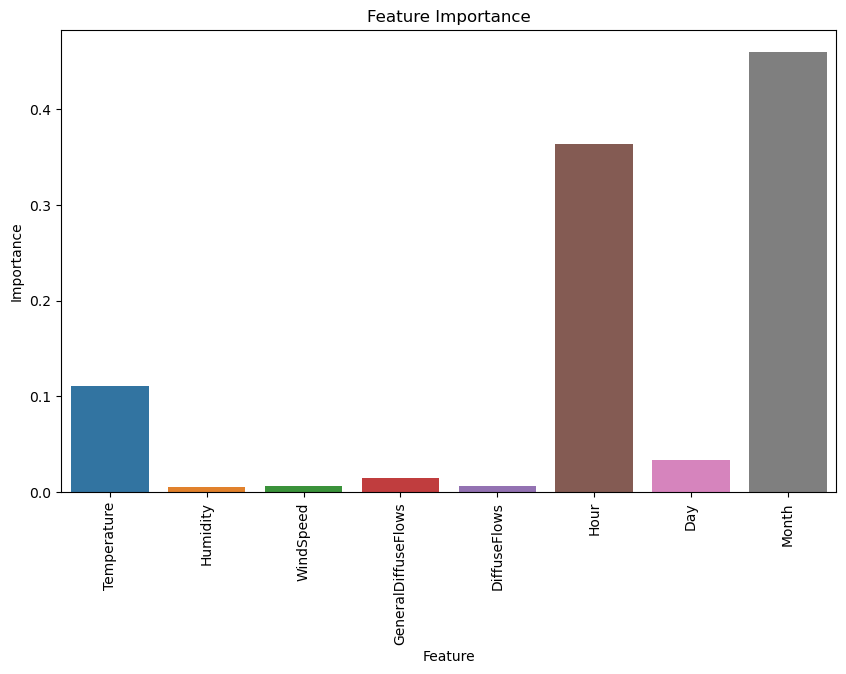

Top 5 most important features: Month, Hour, Temperature, Day, GeneralDiffuseFlows


In [57]:
# Extract feature importances
feature_importances = best_rf.feature_importances_
feature_names = X.columns

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

# Print top 5 most important features
top_features = feature_names[np.argsort(feature_importances)[::-1][:5]]
print(f"Top 5 most important features: {', '.join(top_features)}")

#### Visualize Model Predictions vs. Actual Values
##### To identify any systematic biases or patterns in the model's predictions, visualize the predicted values against the actual values:

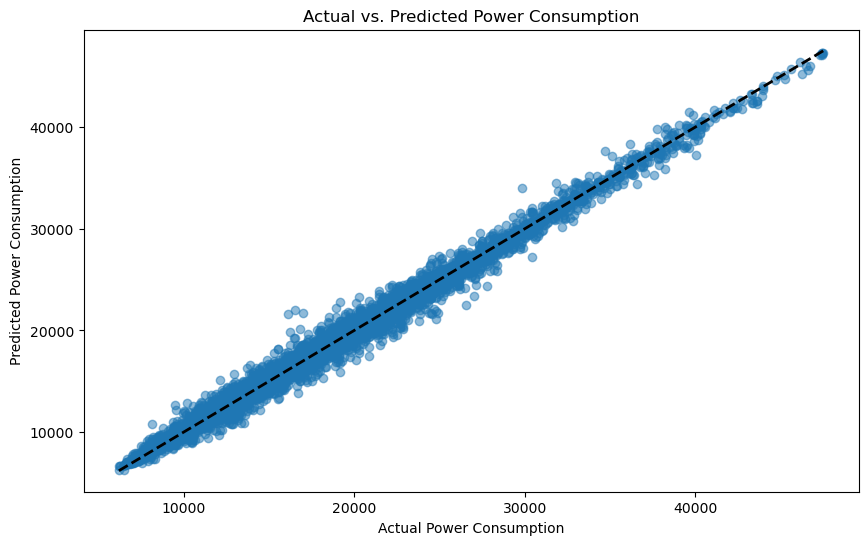

In [62]:
# Visualize model predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Actual vs. Predicted Power Consumption')
plt.show()